In [100]:
from ScriptFiles import DataCleaning_and_Prediction as dc
from ScriptFiles import DataRead_and_PreClean as dr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
 

In [101]:
#############################################################################
### Function to plot Data profile in terms of fuelvoltage, Distance over time

def plotData_profiles(df):
    plt.rcParams['figure.figsize'] = [16, 12]

    #### 1. Checking order of Data, as per datetime
    plt.subplot(3,1,1)
    plt.plot(df.index, df.datetime, 'g.', markersize=1, linewidth=1);

    plt.subplot(3,1,2)
    plt.plot(df.index, df.fuelVoltage, 'g.', markersize=2, linewidth=1);

    plt.subplot(3,1,3)
    plt.plot(df.index, df.distance, 'g-', markersize=2, linewidth=1);
    plt.title("Cumulative Distance vs Time", fontsize=15)
    plt.show()

In [102]:
#######################################################
### Function to Plot theft Points over Cleaned Data

def plot_theftpts(cleanedDf , theftpts=[], refPts=[], xlim=[], ylim1 = [], ylim2 = []):

    plt.rcParams['figure.figsize'] = [20, 4]
    # plt.subplot(6,1,1)
    fig, ax1 = plt.subplots()
    ax1.plot(cleanedDf.index, cleanedDf.fuelVoltage, 'g.', markersize=2, linewidth=1)
    ax1.set_xlabel('time index')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('FuelVoltage', color='b')
    ax1.tick_params('y', colors='b')
    if len(ylim1)!=0:
        ax1.set_ylim(ylim1)

    ax2 = ax1.twinx()
    ax2.plot(cleanedDf.index, cleanedDf.distance, 'b-', markersize=2, linewidth=1)
    ax2.set_ylabel('Distance', color='b')
    if len(ylim2)!=0:
        ax2.set_ylim(ylim2)
    plt.title("Initial Prediction theft Points - ZOOMED")
    if len(xlim) !=0:
        plt.xlim(xlim)
    
    for pt in theftpts:
        ax1.axvline(pt, color = 'black')
        
    for pt in refPts:
        ax1.axvline(pt, color = 'Red')
    plt.show()


In [103]:
def plot_Results(df, df_clean, result_df, theftpts=[], refPts=[], xlim = [], ylim1 = [], ylim2 = []):

    plt.rcParams['figure.figsize']=[16,12]
    fig, axi = plt.subplots(4, 1)
    axi[0].plot(df.datetime, df.fuelVoltage, 'g.', markersize=1, linewidth=1);
    #plt.plot(df.datetime, df.distance, 'b-', markersize=1, linewidth=1);
    axi[0].set_title('Original FuelData vs Time')
    axi[0].set_xlabel('time')

    axi[1].plot(df_clean.index, df_clean.fuelVoltage, 'g.', markersize=2, linewidth=1)
    axi[1].set_xlabel('time index')
    # Make the y-axis label, ticks and tick labels match the line color.
    axi[1].set_ylabel('FuelVoltage', color='b')
    axi[1].tick_params('y', colors='b')
    if len(ylim1) != 0:
        axi[1].set_ylim(ylim1)

    ax2 = axi[1].twinx()
    ax2.plot(df_clean.index, df_clean.distance, 'b-', markersize=2, linewidth=1)
    ax2.set_ylabel('Distance', color='b')
    if len(ylim2) != 0:
        ax2.set_ylim(ylim2)
    if len(xlim) != 0:
        plt.xlim(xlim)
    axi[1].set_title('Cleaned Data')
    for pt in theftpts:
        axi[1].axvline(pt, color = 'black')
        
    for pt in refPts:
        axi[1].axvline(pt, color = 'Red')
    
    
    
    axi[2].plot(df_clean.index, df_clean.fuelVoltage, 'g.', markersize=2, linewidth=1)
    axi[2].set_xlabel('time index')
    # Make the y-axis label, ticks and tick labels match the line color.
    axi[2].set_ylabel('FuelVoltage', color='b')
    axi[2].tick_params('y', colors='b')
    if len(ylim1)!=0:
        axi[2].set_ylim(ylim1)

    ax2 = axi[2].twinx()
    ax2.plot(df_clean.index, df_clean.distance, 'b-', markersize=2, linewidth=1)
    ax2.set_ylabel('Distance', color='b')
    if len(ylim2)!=0:
        axi[2].set_ylim(ylim2)
        
    if len(xlim) !=0:
        plt.xlim(xlim)
    plt.title('Final Predicted Theft Pts - ZOOMED')

    for pt in result_df.theft_index:
        plt.axvline(pt, color = 'black')
        
    for pt in refPts:
        axi[2].axvline(pt, color = 'Red')

    axi[3].plot(result_df.theft_index, result_df['fuel_PercentJump'], 'g-', markersize=3, linewidth=1);
    axi[3].set_title('Fuel/km Ratio at Predicted theft pts - ZOOMED')
    
    axi[3].set_xlabel('time index')
    
    fig.tight_layout()

#     if len(xlim) !=0:
#         plt.xlim(xlim)
#     if len(ylim)!=0:
#         plt.ylim(ylim)

    #plt.plot(df_clean.index, df_clean.distance, 'b-', markersize=1, linewidth=1);

    plt.show()

Text(0.5,1,'Simple plot')

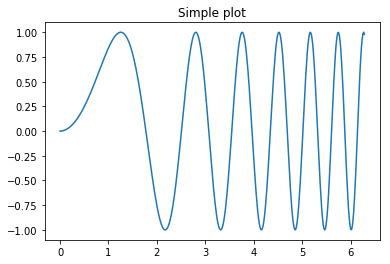

In [104]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

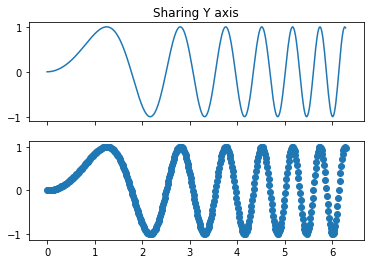

In [105]:
#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

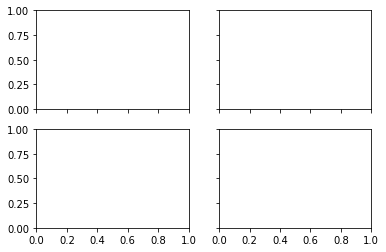

In [106]:
#Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all');

In [107]:
#####################################################################
### Function to generate FuelMaxVoltage & FuelMinVoltage, to be sent
### to the main devices database for records.
def Gen_FuelMaxMin(df):
    df = dr.perform_PreFormating(df)
    dff = dr.perform_postFormating(df)

    fmax = dff.fuelVoltage.max()
    fmin = dff.fuelVoltage.min()

    df_clean = dc.Clean_NoiseData(dff, 6, fmax, fmin)

    return df_clean.fuelVoltage.max(), df_clean.fuelVoltage.min()

In [108]:
folderpath = r"G:\Analytics\FuelAnalysis\test2"
savePath = r"G:\Analytics\FuelAnalysis\results"
filepath = r""
fuelMax = 100
df_list, filesname = dr.read__MultipleCSVs(folder_path= folderpath, nfiles=4)
ctr = 0
def formatDf(df):
    #df_list[0].info()
    df = dr.perform_PreFormating(df)
    print ("Dataset_"+str(ctr+1) +" Preformatting Done")

    dff = dr.perform_postFormating(df)
    print("Dataset_" + str(ctr + 1) + " Postformatting Done")
    return dff

def cleanDF(dff, fuelMax, fuelMin):
    df_clean = dc.Clean_NoiseData(dff, 6, fuelMax, fuelMin)
    print("Dataset_" + str(ctr + 1) + " Data Cleaning Done")
    return df_clean

def findtheft(df_clean, lvl, fuelMax, fuelMin):
    theft_pts, refpts = dc.jump_point(df_clean, lvl, fuelMax, fuelMin)
    print("Dataset_" + str(ctr + 1) + " Theft & Refuel points Indentified")
    return theft_pts, refpts

    

G:\Analytics\FuelAnalysis\test2\cordinates_007042639339.csv
G:\Analytics\FuelAnalysis\test2\cordinates_007042640749.csv
G:\Analytics\FuelAnalysis\test2\cordinates_007042641148.csv
G:\Analytics\FuelAnalysis\test2\cordinates_008527948598.csv


In [109]:
#plotData_profiles(df)
df = df_list[1]
df = df[:]
df = df.reset_index(drop= True)
df.st = df.io_state.apply(lambda x: x[1])
dis = df[df.st == '0'].distance.apply(lambda x: int(x))

C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


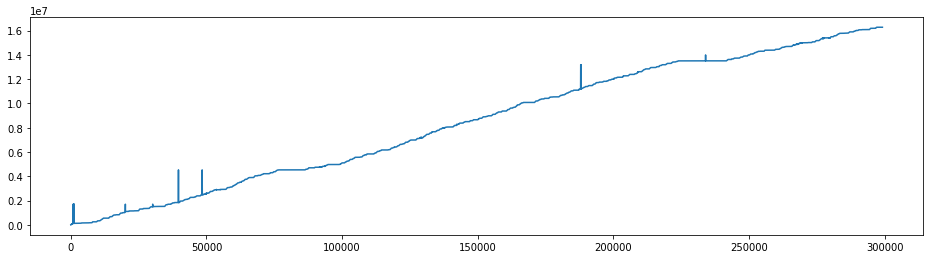

In [110]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(dis)

In [111]:
fuelMax, fuelMin = Gen_FuelMaxMin(df)

In [112]:
dff = formatDf(df.copy())
Dmax = dff.distance.max()

Dataset_1 Preformatting Done
Dataset_1 Postformatting Done


In [113]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12813 entries, 0 to 12812
Data columns (total 7 columns):
datetime       12813 non-null datetime64[ns]
lat            12813 non-null float64
long           12813 non-null float64
speed          12813 non-null float64
distance       12813 non-null float64
fuelVoltage    12813 non-null float64
dev_state      12813 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 700.8 KB


In [114]:
sum(dff[dff.dev_state==0].fuelVoltage <3)

0

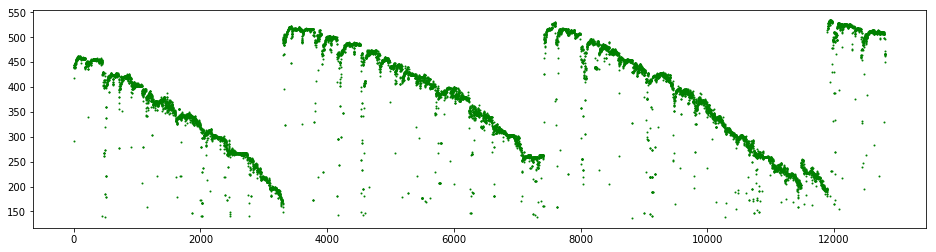

In [115]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(dff.index, dff.fuelVoltage,'g.', markersize = 2);


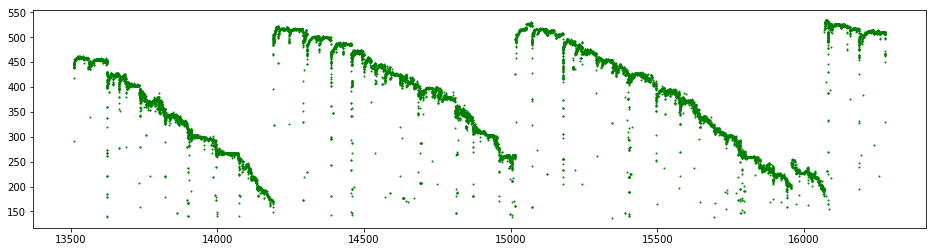

In [116]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(dff.distance*0.001, dff.fuelVoltage, 'g.', markersize = 2)

In [117]:
dff.fuelVoltage.median()

392.0

In [118]:
dff.fuelVoltage.std()

99.47622599067286

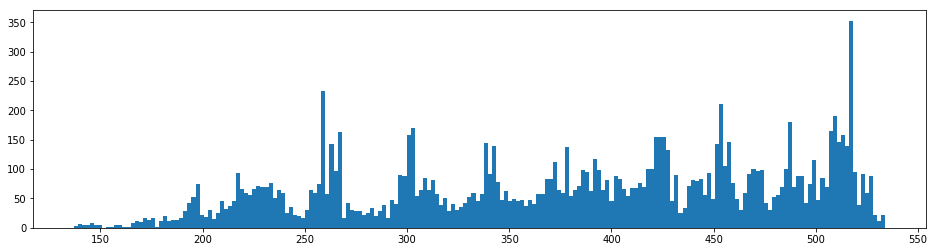

In [119]:
plt.rcParams['figure.figsize'] = [16,4]
plt.hist(dff.fuelVoltage,200);
#plt.xlim(0,0.02)
#plt.ylim(0,2.5)

C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


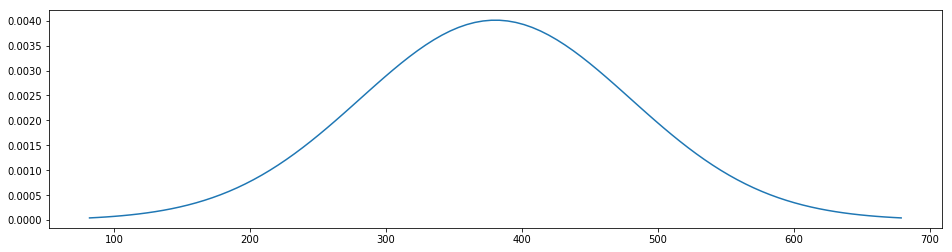

In [120]:
import matplotlib.mlab as mlab
mu = dff.fuelVoltage.mean()
#variance = (dff.fuelVoltage.std())*(dff.fuelVoltage.std())
sigma = dff.fuelVoltage.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

In [121]:
dff[(dff.fuelVoltage == 0)  & (dff.dev_state == 1)]

,datetime,lat,long,speed,distance,fuelVoltage,dev_state


In [122]:
df_clean = cleanDF(dff.copy(), fuelMax, fuelMin)

Dataset_1 Data Cleaning Done


In [125]:
theft_pts, refpts = findtheft(df_clean, 0.02, fuelMax, fuelMin)

**
35
Dataset_1 Theft & Refuel points Indentified


In [124]:
refpts

[1723, 3859, 4411, 5889, 6106]

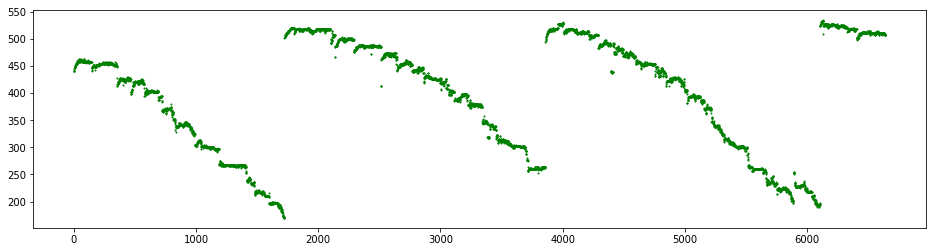

In [126]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(df_clean.index, df_clean.fuelVoltage,'g.', markersize = 2)
#plt.xlim(0,8000)

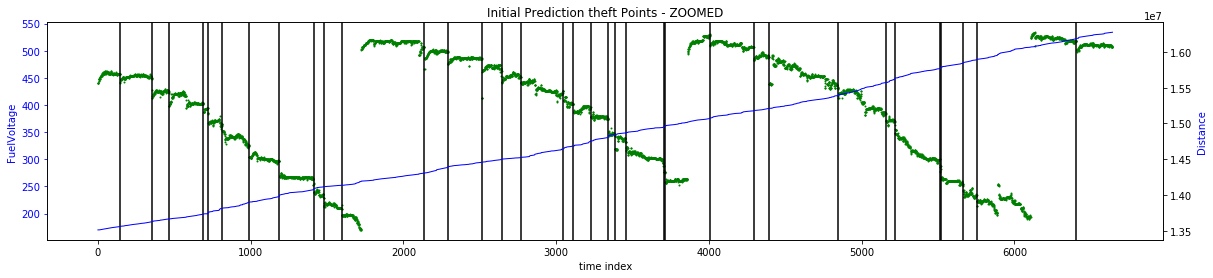

28


In [129]:
xlim = []
ylim = []
plot_theftpts(df_clean,refPts=[],theftpts=theft_pts,  xlim = xlim, ylim1= ylim)
result_df = dc.generate_PredictTable(df_clean,theft_pts,float(1), 1)

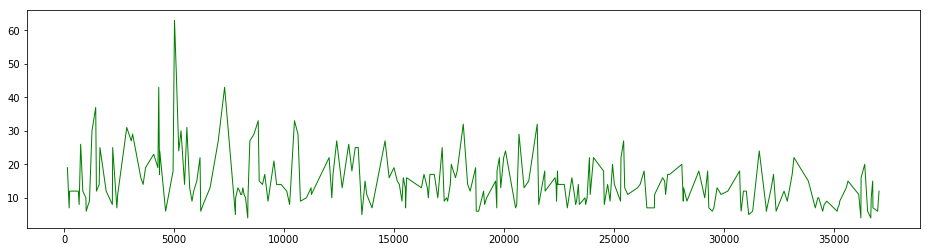

In [67]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(result_df.theft_index, result_df['fuel_PercentJump'], 'g-', markersize=3, linewidth=1);
#plt.ylim(0,400)

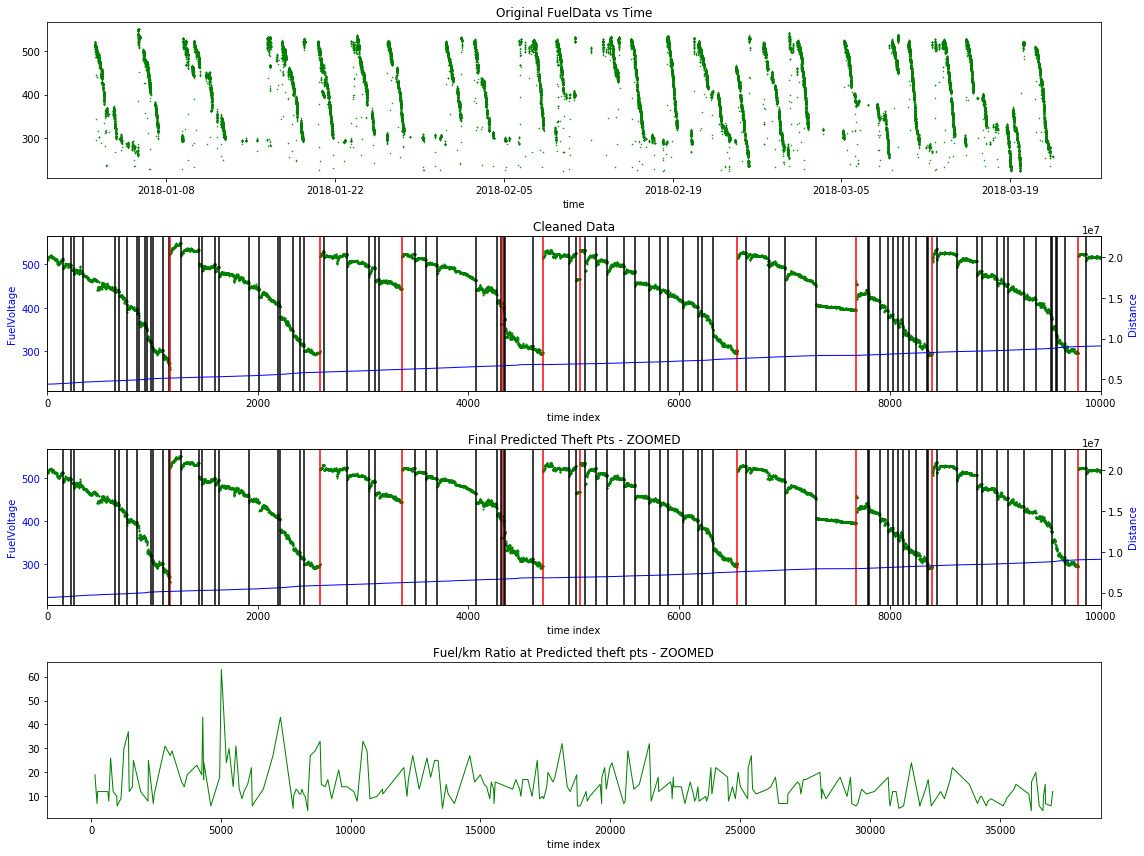

     theft_index        lat       long          theft_time  fuel_PercentJump  dist_jump(KM)       time_jump  Possibility  FuelVoltagePerKM
0            152  24.374520  78.538627 2018-01-02 04:32:27              19.0          3.988 0 days 00:45:56         True          4.764293
1            231  23.896742  78.766580 2018-01-02 06:23:41               7.0          3.475 0 days 00:03:28         True          2.014388
2            253  23.775587  78.809080 2018-01-02 06:44:43              12.0          4.928 0 days 00:20:52         True          2.435065
4            648  22.643562  80.069647 2018-01-02 15:57:20              12.0          1.923 0 days 00:02:30         True          6.240250
5            685  22.622747  80.247662 2018-01-02 16:23:52               8.0          1.617 0 days 00:02:33         True          4.947434
6            755  22.492670  80.518318 2018-01-02 17:45:41              26.0          9.001 0 days 01:26:36         True          2.888568
7            853  22.275203

In [70]:
#build_savePath = savePath + r"\result_dataset_" + filesname[ctr].replace(folderpath,"").replace('\\', "")
#result_df.to_csv(build_savePath)

plot_Results(dff,df_clean, result_df, theft_pts, refpts , xlim = xlim, ylim1=[]);
#ctr+=1
print(result_df)

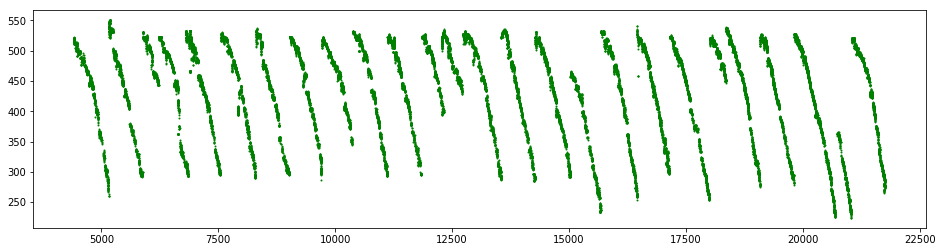

In [73]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(df_clean.distance*0.001, df_clean.fuelVoltage, 'g.', markersize = 2)

In [140]:
def findAVG(cleanDf, Dmax):
    i = 0
    ds = 0
    df = 0
    dsRef = 0
    dt = 10000
    avgdt_lst = []
    mean_lst = []
    median_lst = []
    indexlst_lst = []
    ctr = 0
    df1 = 0
    print(Dmax)
    while dt < 30000:
        avgDT = []
        indexlst = []
        #print (dt)
        i=0
        while i<len(cleanDf): 
            ds = 0
            df1 = 0
            dsRef = cleanDf.distance[i]
            dfRef = cleanDf.fuelVoltage[i]
            while ((ds)<=dt  and i<len(cleanDf)):
                ds = (cleanDf.distance[i] - dsRef)
                i+=1
                #print(i)

            if i<len(cleanDf):
                df = dfRef- cleanDf.fuelVoltage[i]
                if df>0 :
                    avg = df/ds
                    avgDT.append(avg)
                    indexlst.append(cleanDf.index[i])
            
            #print(df)
        indexlst_lst.append(indexlst)
        avgdt_lst.append(avgDT)
        med = pd.Series(avgDT).median()
        mean = pd.Series(avgDT).mean()
        #print (med,mean,mode)

        median_lst.append(med)
        mean_lst.append(mean)
        ctr+=1
        dt += 1000
        print (dt)

        
    return [median_lst,mean_lst], avgdt_lst, indexlst_lst

central_DT, avgLst, indexlst = findAVG(df_clean, Dmax)

16277888.0
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000


In [141]:
len(df_clean), len(avgLst), len(indexlst)

(6643, 20, 20)

Text(0.5,1,'Median dF/dS vs Increasing Ds')

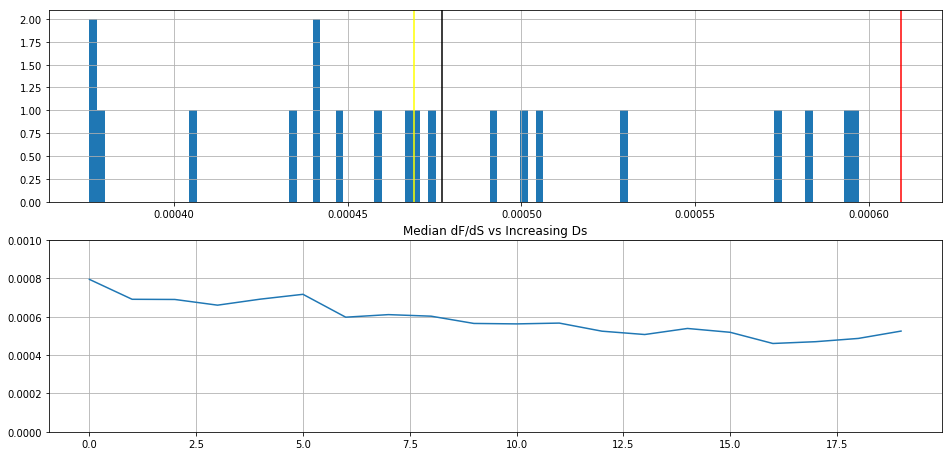

In [142]:
#dt = [i*100 for (i,dt) in zip(len(central_DT[0]),Dmax) ]
plt.rcParams['figure.figsize'] = [16,12]
plt.subplot(3,1,1)
plt.hist(central_DT[0],bins =100);
plt.grid()
plt.axvline(pd.Series(central_DT[0]).mean(), color = 'black')
plt.axvline(pd.Series(central_DT[0]).median(), color = 'yellow')
plt.axvline(pd.Series(central_DT[0]).median() + 2*pd.Series(central_DT[0]).std(), color = 'Red')

#plt.ylim(0,.005)
plt.subplot(3,1,2)
plt.plot(central_DT[1]);
plt.ylim(0,.001)
plt.grid()
plt.title("Median dF/dS vs Increasing Ds")

#plt.plot(central_DT[2]);

        

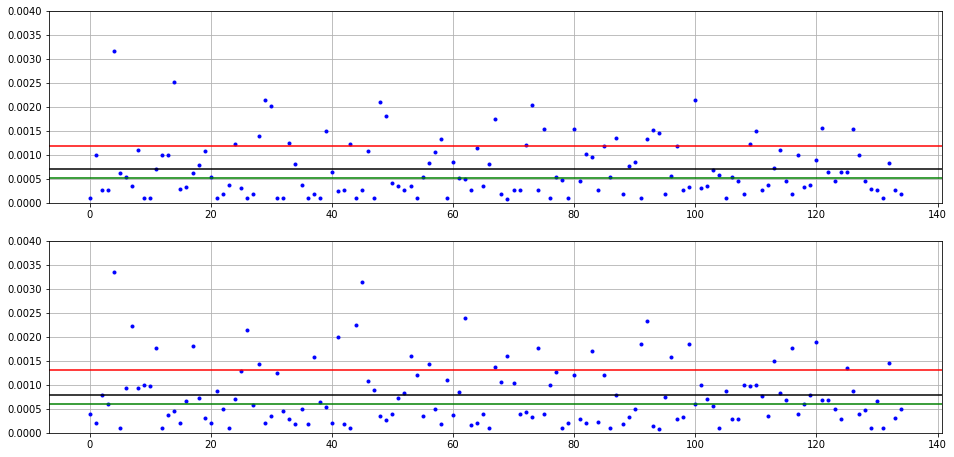

In [146]:
plt.rcParams['figure.figsize'] = [16,12]
plt.subplot(3,1,1)
plt.plot(avgLst[1],'b.');
plt.grid()
plt.ylim(0,.004)

plt.axhline(pd.Series(avgLst[1]).mean(), color = 'black')
plt.axhline(pd.Series(avgLst[1]).median(), color = 'green')
plt.axhline(2*pd.Series(avgLst[1]).std(), color = 'Red')
#plt.xlim(0,500)
plt.subplot(3,1,2)
plt.plot(avgLst[0], 'b.');
plt.axhline(pd.Series(avgLst[0]).mean(), color = 'black')
plt.axhline(pd.Series(avgLst[0]).median(), color = 'green')
plt.axhline(2*pd.Series(avgLst[0]).std(), color = 'Red')

plt.ylim(0,.004)
plt.grid()

In [134]:
(indexlst[0])

[89,
 125,
 153,
 330,
 356,
 409,
 484,
 579,
 693,
 724,
 803,
 831,
 868,
 929,
 948,
 963,
 979,
 991,
 1061,
 1117,
 1171,
 1190,
 1239,
 1379,
 1411,
 1417,
 1479,
 1543,
 1612,
 1667,
 1687,
 1704,
 1713,
 1823,
 1904,
 1951,
 2016,
 2102,
 2140,
 2218,
 2291,
 2293,
 2419,
 2480,
 2518,
 2646,
 2770,
 2863,
 2881,
 2903,
 2933,
 3009,
 3049,
 3086,
 3115,
 3217,
 3227,
 3246,
 3291,
 3344,
 3400,
 3435,
 3469,
 3537,
 3556,
 3584,
 3621,
 3703,
 3709,
 3722,
 4009,
 4099,
 4127,
 4215,
 4310,
 4380,
 4438,
 4509,
 4544,
 4578,
 4598,
 4648,
 4683,
 4758,
 4789,
 4824,
 4846,
 4858,
 4887,
 4962,
 4978,
 5006,
 5021,
 5078,
 5092,
 5130,
 5175,
 5203,
 5218,
 5240,
 5258,
 5297,
 5309,
 5321,
 5349,
 5380,
 5404,
 5430,
 5493,
 5516,
 5526,
 5552,
 5649,
 5666,
 5690,
 5730,
 5754,
 5836,
 5861,
 5877,
 5900,
 5916,
 5984,
 5998,
 6017,
 6060,
 6100,
 6188,
 6237,
 6315,
 6332,
 6390,
 6409,
 6516,
 6589]

In [135]:
plt.hist(avgLst[1][abs(avgLst[1] - avgLst[1].mean()) < 3*avgLst[1].std()],bins = 200)
plt.axvline(avgLst[1].median(), color = 'black')
plt.axvline(avgLst[1].mean(), color = 'green')

AttributeError: 'list' object has no attribute 'mean'

In [136]:
from ipywidgets import *
from IPython.display import display
# w = IntSlider()
# display(w)
def f(x):
    return x
interact(f, x= IntSlider(min=-10, max=30, step=1,value=1));

interactive(children=(IntSlider(value=1, description='x', max=30, min=-10), Output()), _dom_classes=('widget-i…

In [137]:
def f(x):    
    index = indexlst[x]
    avg = avgLst[x]
    plt.rcParams['figure.figsize'] = [16,4]
    plt.plot(index, avg, 'g.', markersize = 2)
    plt.axhline(pd.Series(avg).median(), color = 'red')
    plt.axhline(pd.Series(avg).mean(), color = 'blue')
    plt.axhline(pd.Series(avg).median() + 2*pd.Series(avg).std(), color = 'Black')
    plt.ylim(0,0.002)

interact(f, x= IntSlider(min=0, max=20, step=1,value=10));

interactive(children=(IntSlider(value=10, description='x', max=20), Output()), _dom_classes=('widget-interact'…

In [242]:
def findAVG(cleanDf, Dmax):
    i = 0
    ds = 0
    df = 0
    dsRef = 0
    dt = (cleanDf.fuelVoltage.max() - cleanDf.fuelVoltage.min())/500
    dtmax = (cleanDf.fuelVoltage.max() - cleanDf.fuelVoltage.min())
    avgdt_lst = []
    mean_lst = []
    median_lst = []
    indexlst_lst = []
    ctr = 0
    df1 = 0
    print(Dmax, dt, dtmax)
    while dt < dtmax:
        avgDT = []
        indexlst = []
        print ("dt = ",dt)
        i=0
        while i<len(cleanDf): 
            df = 0
            dfRef = cleanDf.fuelVoltage[i]
            dsRef = cleanDf.distance[i]
            while (df<=dt  and i<len(cleanDf)):
                df = dfRef - cleanDf.fuelVoltage[i] 
                if df <0 :
                    dfRef = cleanDf.fuelVoltage[i]
                i+=1
                #print(i)
            
            if i<len(cleanDf):
                ds = cleanDf.distance[i] - dsRef
                if df>0 :
                    #print (i)
                    if ds==0:
                        ds = df/1000
                        print("df = ",df,"****",i)
                    avg = df/ds
                    avgDT.append(avg)
                    indexlst.append(cleanDf.index[i])
            
        #print(avgDT)
        #print(dt)
        indexlst_lst.append(indexlst)
        if len(avgDT)!=0 :
            avgdt_lst.append(avgDT)
            med = pd.Series(avgDT).median()
            mean = pd.Series(avgDT).mean()
            #print (med,mean,mode)

            median_lst.append(med)
            mean_lst.append(mean)
        ctr+=1
        dt += dtmax/500
        #print (dt)

        
    return [median_lst,mean_lst], avgdt_lst, indexlst_lst

central_DT, avgLst, indexlst = findAVG(df_clean, Dmax)

16277888.0 0.728 364.0
dt =  0.728
df =  1.0 **** 854
df =  2.0 **** 3277
df =  24.0 **** 3386
df =  1.0 **** 3393
df =  1.0 **** 3398
df =  1.0 **** 4403
df =  1.0 **** 4405
df =  2.0 **** 5162
df =  2.0 **** 6079
0.728
dt =  1.456
df =  2.0 **** 3277
df =  24.0 **** 3386
df =  2.0 **** 5162
1.456
dt =  2.184
2.184
dt =  2.912
2.912
dt =  3.6399999999999997
df =  24.0 **** 3386
3.6399999999999997
dt =  4.367999999999999
df =  24.0 **** 3386
4.367999999999999
dt =  5.095999999999999
5.095999999999999
dt =  5.823999999999999
5.823999999999999
dt =  6.551999999999999
df =  24.0 **** 3386
6.551999999999999
dt =  7.2799999999999985
7.2799999999999985
dt =  8.008
8.008
dt =  8.735999999999999
8.735999999999999
dt =  9.463999999999999
9.463999999999999
dt =  10.191999999999998
10.191999999999998
dt =  10.919999999999998
10.919999999999998
dt =  11.647999999999998
11.647999999999998
dt =  12.375999999999998
12.375999999999998
dt =  13.103999999999997
df =  24.0 **** 3386
13.103999999999997
dt

137.59199999999973
dt =  138.31999999999974
138.31999999999974
dt =  139.04799999999975
139.04799999999975
dt =  139.77599999999975
139.77599999999975
dt =  140.50399999999976
140.50399999999976
dt =  141.23199999999977
141.23199999999977
dt =  141.95999999999978
141.95999999999978
dt =  142.6879999999998
142.6879999999998
dt =  143.4159999999998
143.4159999999998
dt =  144.1439999999998
144.1439999999998
dt =  144.87199999999982
144.87199999999982
dt =  145.59999999999982
145.59999999999982
dt =  146.32799999999983
146.32799999999983
dt =  147.05599999999984
147.05599999999984
dt =  147.78399999999985
147.78399999999985
dt =  148.51199999999986
148.51199999999986
dt =  149.23999999999987
149.23999999999987
dt =  149.96799999999988
149.96799999999988
dt =  150.69599999999988
150.69599999999988
dt =  151.4239999999999
151.4239999999999
dt =  152.1519999999999
152.1519999999999
dt =  152.8799999999999
152.8799999999999
dt =  153.60799999999992
153.60799999999992
dt =  154.33599999999993


278.09600000000137
dt =  278.8240000000014
278.8240000000014
dt =  279.5520000000014
279.5520000000014
dt =  280.2800000000014
280.2800000000014
dt =  281.0080000000014
281.0080000000014
dt =  281.7360000000014
281.7360000000014
dt =  282.4640000000014
282.4640000000014
dt =  283.1920000000014
283.1920000000014
dt =  283.92000000000144
283.92000000000144
dt =  284.64800000000145
284.64800000000145
dt =  285.37600000000145
285.37600000000145
dt =  286.10400000000146
286.10400000000146
dt =  286.83200000000147
286.83200000000147
dt =  287.5600000000015
287.5600000000015
dt =  288.2880000000015
288.2880000000015
dt =  289.0160000000015
289.0160000000015
dt =  289.7440000000015
289.7440000000015
dt =  290.4720000000015
290.4720000000015
dt =  291.2000000000015
291.2000000000015
dt =  291.92800000000153
291.92800000000153
dt =  292.65600000000154
292.65600000000154
dt =  293.38400000000155
293.38400000000155
dt =  294.11200000000156
294.11200000000156
dt =  294.84000000000157
294.8400000000

In [243]:
len(df_clean), len(avgLst), len(indexlst)

(6643, 465, 499)

In [217]:
avgLst

[[0.0018214936247723133,
  0.0007727975270479134,
  0.0007739938080495357,
  0.00046479200557750407,
  0.002117148906139732,
  0.00035829451809387314,
  0.0011337868480725624,
  0.0015625,
  0.0004580852038479157,
  0.0024242424242424242,
  0.0002882675122513693,
  0.0004725897920604915,
  0.0011737089201877935,
  0.0007818608287724785,
  0.0005609573672400897,
  0.002012072434607646,
  0.002304147465437788,
  0.0010193679918450561,
  0.0005005005005005005,
  0.00021299254526091586,
  0.0014124293785310734,
  0.0031847133757961785,
  0.0007451564828614009,
  0.002192699600154779,
  0.00044072278536800354,
  0.0035211267605633804,
  0.0007168458781362007,
  0.0035026269702276708,
  0.0017368649587494573,
  0.0006075334143377885,
  0.000585480093676815,
  0.0005589714924538849,
  0.00048661800486618007,
  0.0005252100840336134,
  0.00023923444976076556,
  0.00015499070055796651,
  0.0010070493454179255,
  0.0036231884057971015,
  0.0016,
  0.0009487666034155598,
  0.0004392708104546453,


In [218]:
central_DT[1]

[inf,
 inf,
 0.010622219023190669,
 0.010622219023190669,
 inf,
 inf,
 0.001946057913756835,
 0.001946057913756835,
 inf,
 0.001779336849718913,
 0.0018041662566040469,
 0.0018041662566040469,
 0.0014791962148121968,
 0.0014428324308822255,
 0.0014428324308822255,
 0.0014214142254122299,
 0.0013689933117290748,
 inf,
 inf,
 0.0012580269050833123,
 0.0013941884331959047,
 0.001338662584736417,
 0.001338662584736417,
 0.001324619239799993,
 0.001150283433659071,
 0.001150283433659071,
 0.000993884352870239,
 0.0009009719087496958,
 0.0009103069051139465,
 0.0009103069051139465,
 0.0009031230095275694,
 0.0009277061413988865,
 0.0008538278535754439,
 0.0008538278535754439,
 0.0008571099547825565,
 0.0008322753424612327,
 0.0008322753424612327,
 0.0007422089157078508,
 0.0007419091892967267,
 0.0007215416385184638,
 0.0007215416385184638,
 0.0007240043096096717,
 0.0007005026097465673,
 0.0006486884359125862,
 0.0006486884359125862,
 0.0006387967565910782,
 0.000705725011655955,
 0.0007057

Text(0.5,1,'Median dF/dS vs Increasing Ds')

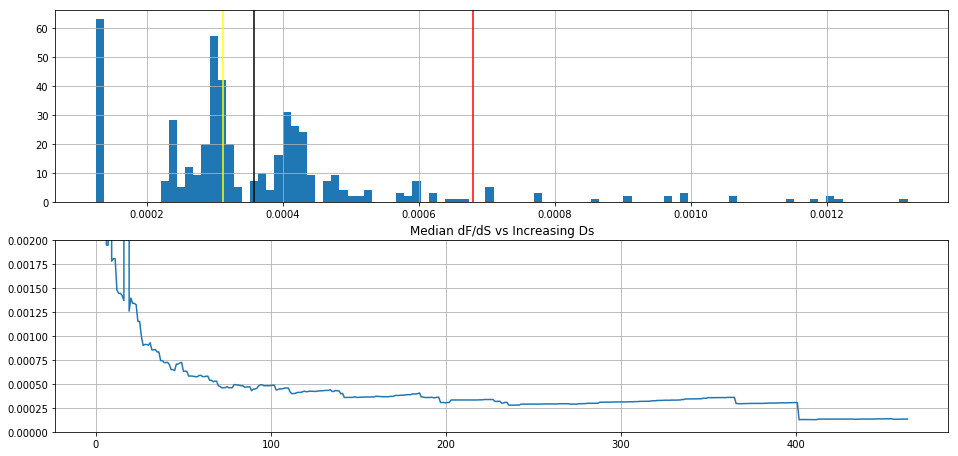

In [230]:
#dt = [i*100 for (i,dt) in zip(len(central_DT[0]),Dmax) ]
plt.rcParams['figure.figsize'] = [16,12]
plt.subplot(3,1,1)
plt.hist(central_DT[0],bins =100);
plt.grid()
plt.axvline(pd.Series(central_DT[0]).mean(), color = 'black')
plt.axvline(pd.Series(central_DT[0]).median(), color = 'yellow')
plt.axvline(pd.Series(central_DT[0]).median() + 2*pd.Series(central_DT[0]).std(), color = 'Red')

#plt.ylim(0,.005)
plt.subplot(3,1,2)
plt.plot(central_DT[1]);
plt.ylim(0,.002)
plt.grid()
plt.title("Median dF/dS vs Increasing Ds")

In [254]:
def f2(x):
    return x
def f(x):    
    index = indexlst[x]
    avg = avgLst[x]
    plt.rcParams['figure.figsize'] = [16,8]
    interact(f2, x=str(pd.Series(avg).median()));
    plt.subplot(2,1,1)
    plt.plot(index, avg, 'g-')
    plt.semilogy()
    plt.axhline(pd.Series(avg).median(), color = 'red')
    plt.axhline(pd.Series(avg).median() + 2*pd.Series(avg).std(), color = 'Black')
   # plt.ylim(0,0.05)
    plt.subplot(2,1,2)
    plt.hist(avg, bins=10)
    plt.semilogy()
    plt.semilogx()
    #plt.ylim(0,0.1)
    #plt.axhline(pd.Series(avg).median(), color = 'red')
   # plt.axhline(pd.Series(avg).mean(), color = 'blue')
   ## plt.axhline(pd.Series(avg).median() + 2*pd.Series(avg).std(), color = 'Black')
    
    
interact(f, x= IntSlider(min=0, max=20, step=1,value=0));


interactive(children=(IntSlider(value=0, description='x', max=20), Output()), _dom_classes=('widget-interact',…

In [249]:
IntProgress(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

IntProgress(value=7, description='Loading:', max=10)

In [ ]:
a = avgDT.value_counts()
avgDT.median(), avgDT.mean(), avgDT.mode()

10km:
mean = 0.0167
median = 0.0131
mode = 0.0037

1km:
mean = 0.0095
median = 0.00562
mode = 0.00187

5km:
mean = 0.00138
median = 0.00936
mode = 0.00187

0.5Km
mean = 0.00138
median = 0.00936
mode = 0.00187

50km
mean = 0.0373
median = 0.0365
mode = 0.0411

100km
mean = 0.065988
median = 0.0692
mode = 0.048689









In [ ]:
plt.plot(df_clean.distance * .001*Dmax, df_clean.fuelVoltage,  'g.')